# SatellitePhenology exact restart (ERS) test fix DIFF comparisons

This notebook visualizes the exact restart differences found for [PR 821](https://github.com/NGEET/fates/pull/821).  

The following test mods are seeing DIFFs against the current baseline:
- `FatesColdDefReducedComplexSatPhen (SMS)`


## Import libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import ctsm_py.fates_xarray_funcs as fx
import nc_time_axis

## Load history output data

In [7]:
# fn_sms_sp_rest = 'SMS_Ld30.f45_f45_mg37.I2000Clm50FatesCruRsGs.cheyenne_intel.clm-FatesColdDefReducedComplexSatPhen.C.issue_1485-dev066-sci1520-fatessuite_int.clm2.h0.2000-01-01-00000.nc'
# fn_sms_sp_rest = 'SMS_Ld30.f45_f45_mg37.I2000Clm50FatesCruRsGs.cheyenne_intel.clm-FatesColdDefReducedComplexSatPhen.C.issue_1485-dev066-sci1520-fatessuite1_int.clm2.h0.2000-01-01-00000.nc'
fn_sms_sp_rest = 'SMS_Ld30.f45_f45_mg37.I2000Clm50FatesCru.cheyenne_intel.clm-FatesColdDefReducedComplexSatPhen.issue_1485-dev066-sci152-z0mdiag-sms.clm2.h0.2000-01-01-00000.nc'
fn_sms_sp_base = 'clm2.h0.2000-01-01-00000_sms_sp.nc'

fn_ers_fbg_rest = 'ERS_Ld30.f45_f45_mg37.I2000Clm50FatesCruRsGs.cheyenne_intel.clm-FatesColdDefReducedComplexFixedBiogeo.C.issue_1485-dev066-sci1520-fatessuite_int.clm2.h0.2000-01-01-00000.nc'
fn_ers_fbg_base = 'clm2.h0.2000-01-01-00000_fbg.nc'

data_sms_sp_base = xr.open_dataset(fn_sms_sp_base)
data_sms_sp_rest = xr.open_dataset(fn_sms_sp_rest)
data_ers_fbg_base = xr.open_dataset(fn_ers_fbg_base)
data_ers_fbg_rest = xr.open_dataset(fn_ers_fbg_rest)

## Plot the GPP data

### `FatesColdDefReducedComplexSatPhen` (SMS)

Variable diff calculations

In [8]:
gpp_sms_sp_base = data_sms_sp_base.FATES_GPP
gpp_sms_sp_rest = data_sms_sp_rest.FATES_GPP
gpp_sms_sp_diff = gpp_sms_sp_base - gpp_sms_sp_rest

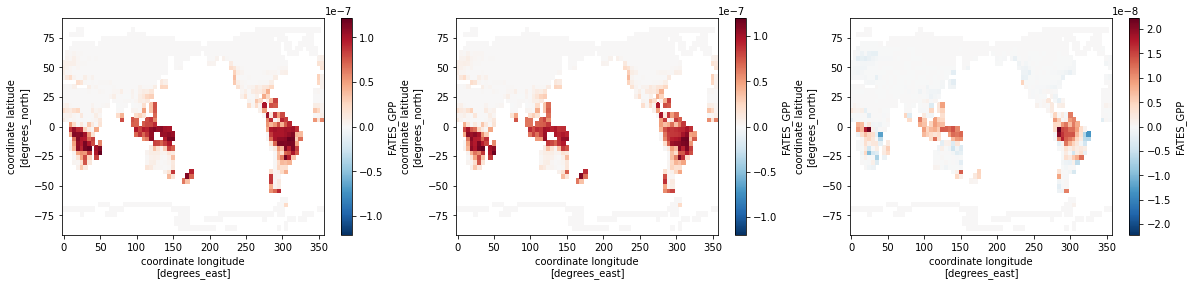

In [9]:
# GPP mean over time
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_sms_sp_base.mean(dim='time').plot(ax=ax1)
gpp_sms_sp_rest.mean(dim='time').plot(ax=ax2)
gpp_sms_sp_diff.mean(dim='time').plot(ax=ax3)

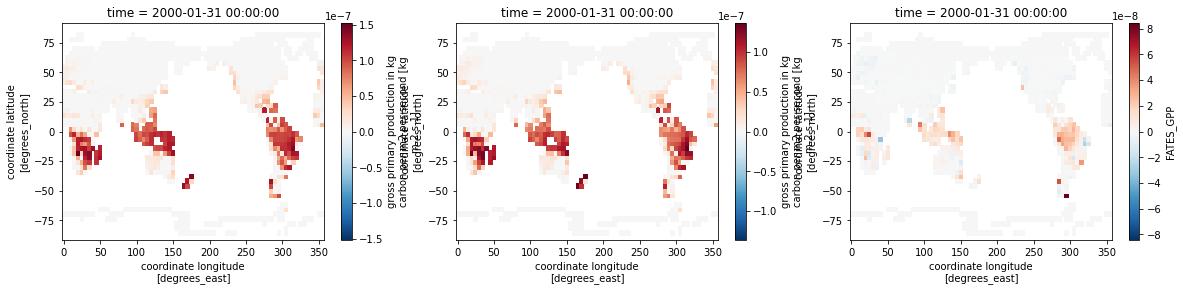

In [10]:
# GPP last time step
tstop_idx = 30
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_sms_sp_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_sms_sp_rest.isel(time=tstop_idx).plot(ax=ax2)
gpp_sms_sp_diff.isel(time=tstop_idx).plot(ax=ax3)

### Z0M

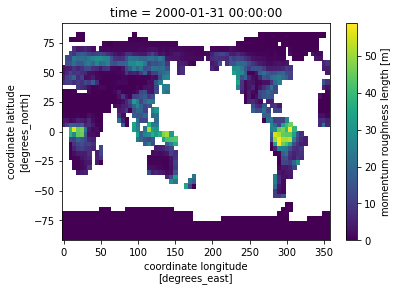

In [11]:
data_ers_sp.Z0M.isel(time=30).plot()

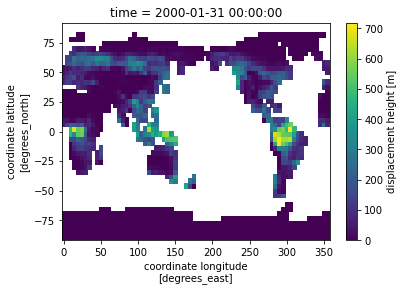

In [12]:
data_ers_sp.DISPLA.isel(time=30).plot()